In [1]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wave, fs = librosa.load('/Users/noise/Code/soundsplit/input/test.wav', sr=44100)

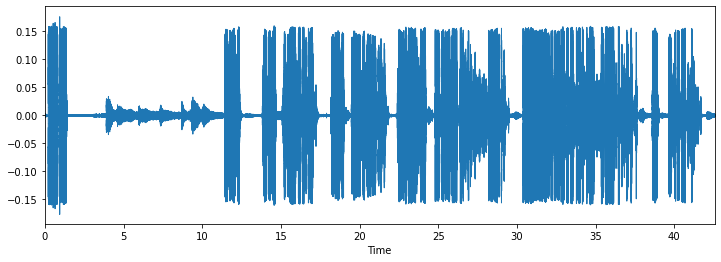

In [3]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(wave, sr=fs)
plt.show()


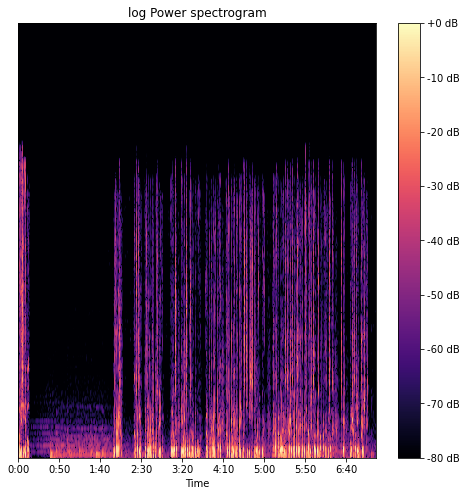

In [4]:
mag, phase = librosa.magphase(librosa.stft(wave, n_fft=1024, win_length=400))
plt.figure(figsize=(8,8))
librosa.display.specshow(librosa.amplitude_to_db(mag, ref=np.max), x_axis='time')
plt.title('log Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [5]:
frame_len = int(1000 * fs /1000) # 1s
frame_shift = int(100 * fs /1000) # 10ms
# calculate RMS
rms = librosa.feature.rms(wave, frame_length=frame_len, hop_length=frame_shift)
rms = rms[0]
rms = librosa.util.normalize(rms, axis=0)

# calculate zero-crossing rate
zrc = librosa.feature.zero_crossing_rate(wave, frame_length=frame_len, hop_length=frame_shift, threshold=0)
zrc = zrc[0]
zrc = librosa.util.normalize(zrc, axis=0)

mfcc is [-4.5698840e+02  1.3257741e+02  2.1637253e+01  3.0366079e+01
  2.4774523e-01  1.7337523e+01 -1.7951579e+00  2.0664980e+00
 -9.7926302e+00 -3.8332922e+00 -3.9429033e+00 -7.6141181e+00
 -3.1639006e+00 -6.2445984e+00  4.4782557e-02 -4.7335515e+00
 -2.0975311e-01 -1.8053976e+00 -5.3294814e-01 -3.7785811e+00]


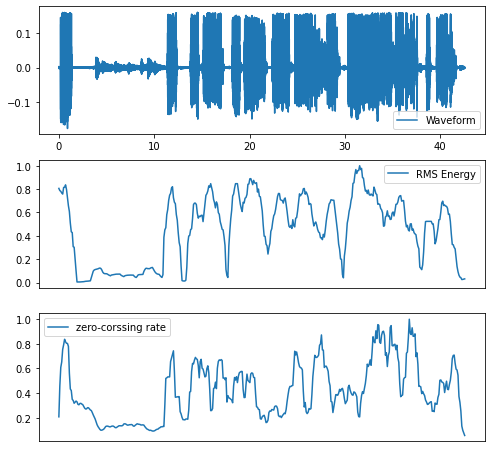

In [6]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
t = np.linspace(0, len(wave)/fs, len(wave))
plt.plot(t, wave, label='Waveform')
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(rms.T, label='RMS Energy')
plt.xticks([])
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(zrc.T, label='zero-corssing rate')
plt.xticks([])
plt.legend(loc='best')
plt.show()

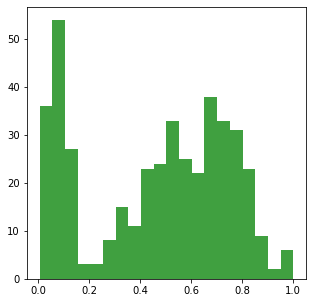

In [7]:
plt.figure(figsize=(5, 5))
n, bins, patches = plt.hist(rms.T, 20, facecolor='g', alpha=0.75)

In [8]:
frame_idxs = np.where( (rms > np.std(rms)) | (zrc >  np.average(zrc)) )[0]


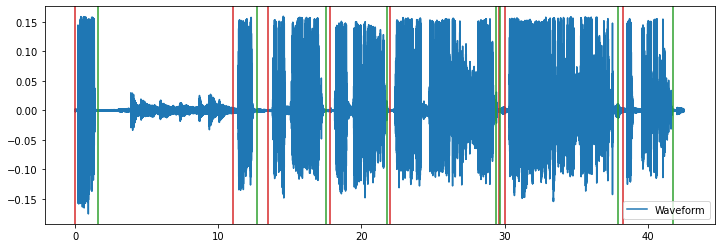

In [9]:
# get start-points and end-points
def getboundaries(frame_idxs):
    start_idxs = [frame_idxs[0]]
    end_idxs = []

    shapeofidxs = np.shape(frame_idxs)
    for i in range(shapeofidxs[0]-1):
        if (frame_idxs[i + 1] - frame_idxs[i]) != 1:
            end_idxs.append(frame_idxs[i])
            start_idxs.append(frame_idxs[i+1])

    end_idxs.append(frame_idxs[-1])
    # del the last boundaries if it is both start point and end point.
    if end_idxs[-1] == start_idxs[-1]:
        end_idxs.pop()
        start_idxs.pop()
    assert len(start_idxs) == len(end_idxs), 'Error! Num of start_idxs doesnt match Num of end_idxs.'
    start_idxs = np.array(start_idxs)
    end_idxs = np.array(end_idxs)
    start_t = start_idxs * frame_shift / fs
    end_t = end_idxs * frame_shift / fs
    return start_t, end_t

start_t, end_t = getboundaries(frame_idxs)



plt.figure(figsize=(12, 4))
t = np.linspace(0, len(wave)/fs, len(wave))
plt.plot(t, wave, label='Waveform')
for s, e in zip(start_t, end_t):
    plt.axvline(x=s, color='#d62728') # red vertical line
    plt.axvline(x=e, color='#2ca02c') # green vertical line
plt.legend(loc='best')
plt.show()


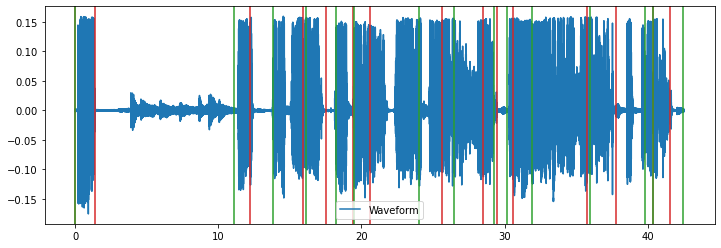

In [10]:
noise_idxs = np.where( (rms < np.std(rms)) | (zrc < np.average(zrc)) )[0]

start_n, end_n = getboundaries(noise_idxs)

plt.figure(figsize=(12, 4))
t = np.linspace(0, len(wave)/fs, len(wave))
plt.plot(t, wave, label='Waveform')
for s, e in zip(start_n, end_n):
    plt.axvline(x=s, color='#d62728') # red vertical line
    plt.axvline(x=e, color='#2ca02c') # green vertical line
plt.legend(loc='best')
plt.show()

In [11]:
print(np.std(zrc))

0.22710005523659524
